                                                        HOME WORK 7 on Fitting
                                                        

AUC PERERA - D/ENG/21/0079/EE

    Question 1

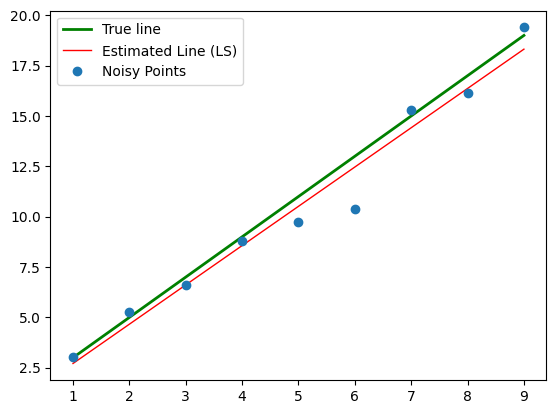

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# true line y = m*x + c
m = 2 # gradient 
c = 1 # intercept
x = np.arange(1,10, 1)
np.random.seed(45)
no = np.random.randn(len(x)) # noise
o = np.zeros(x.shape)

# o[1] = 20 #outliers

y = m*x + c + no + o

n = len(x)

X = np.concatenate([x.reshape(n,1), np.ones((n, 1))], axis=1)
B = np.linalg.pinv(X.T @ X) @ X.T @ y
mstar = B[0]
cstar = B[1]

plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1] + c], color='g', linewidth=2, label=r'True line')
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + cstar], color='r', linewidth=1, label=r'Estimated Line (LS)')
plt.plot(x,y, 'o', label='Noisy Points')
plt.legend(loc='best')
plt.show()

Question 2

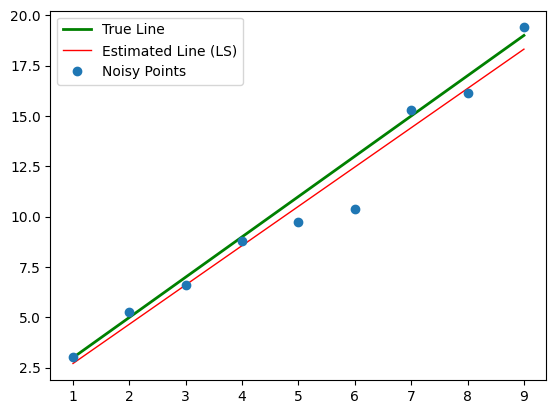

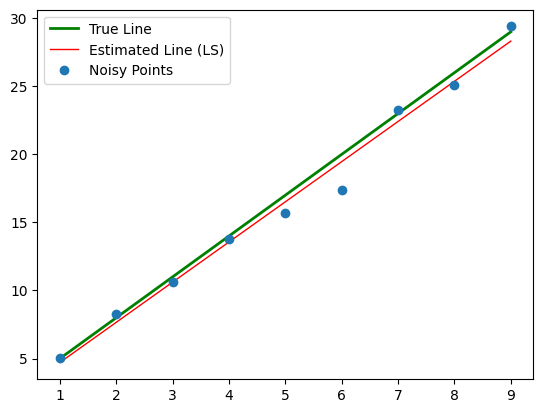

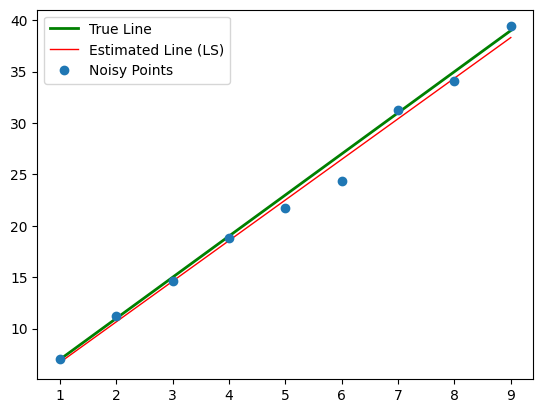

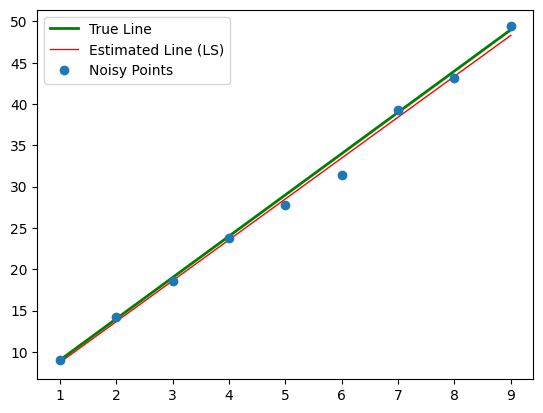

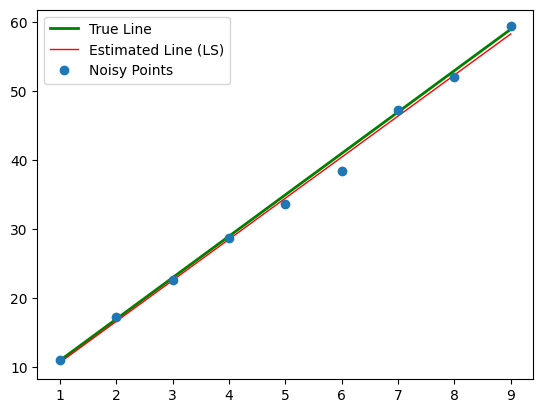

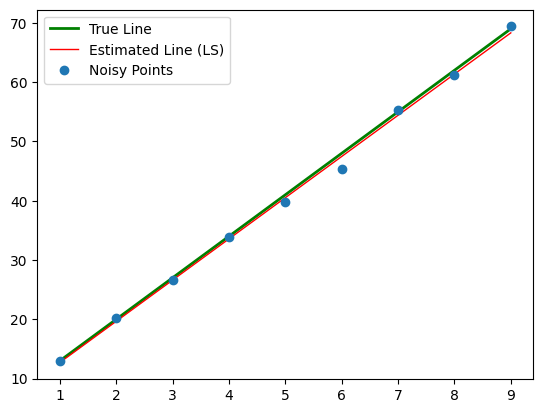

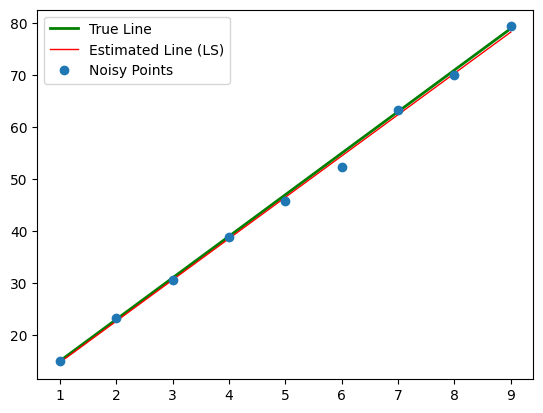

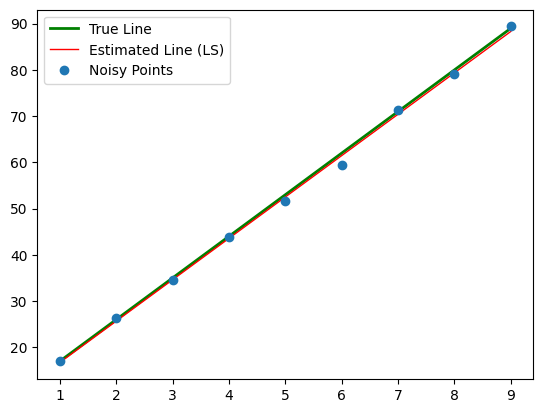

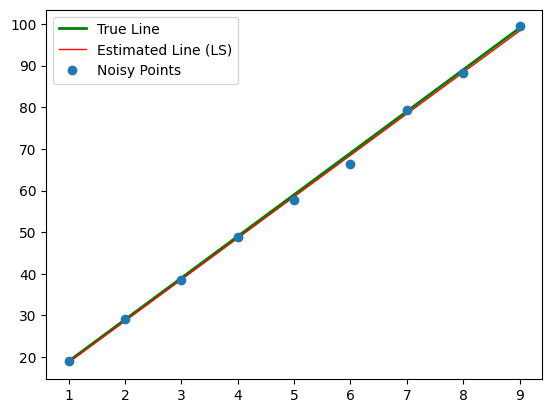

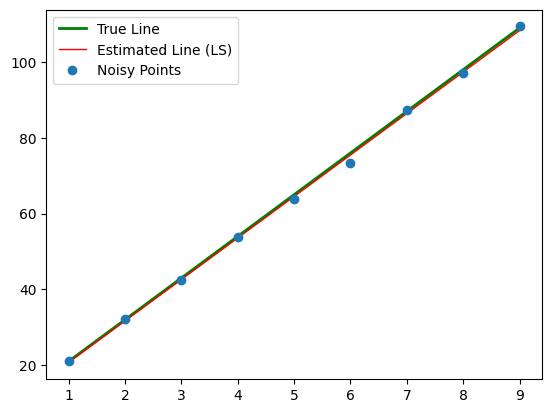

In [2]:
import numpy as np
import matplotlib.pyplot as plt
i = 0

while i < 10:
    # true line y = m*x + c
    m = 2+i # gradient 
    c = 1+i # intercept
    x = np.arange(1,10, 1)
    np.random.seed(45)
    no = np.random.randn(len(x)) #noise
    o = np.zeros(x.shape)

    # o[1] = 20

    y = m*x + c + no + o

    n = len(x)

    X = np.concatenate([x.reshape(n,1), np.ones((n, 1))], axis=1)
    B = np.linalg.pinv(X.T @ X) @ X.T @ y
    mstar = B[0]
    cstar = B[1]

    plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1] + c], color='g', linewidth=2, label=r'True Line')
    plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + cstar], color='r', linewidth=1, label=r'Estimated Line (LS)')
    plt.plot(x,y, 'o', label='Noisy Points')
    plt.legend(loc='best')
    plt.show()

    i = i + 1

Question 3

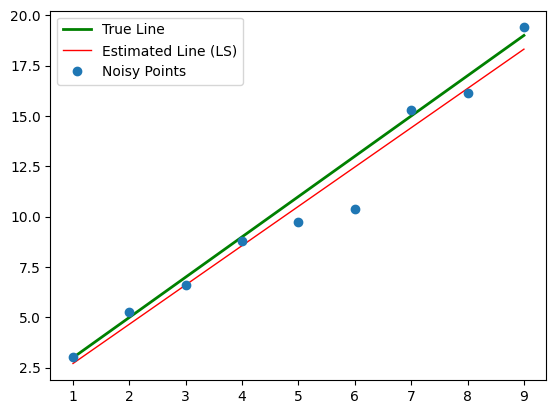

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# true line y = m*x + c
m = 2 # gradient 
c = 1 # intercept
x = np.arange(1,10, 1)
np.random.seed(45)
no = np.random.randn(len(x)) # noise
o = np.zeros(x.shape)

# o[1] = 20 #outliers

y = m*x + c + no + o

n = len(x)

X = np.concatenate([x.reshape(n,1), np.ones((n, 1))], axis=1)
B = np.linalg.pinv(X.T @ X) @ X.T @ y
mstar = B[0]
cstar = B[1]

plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1] + c], color='g', linewidth=2, label=r'True Line')
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + cstar], color='r', linewidth=1, label=r'Estimated Line (LS)')
plt.plot(x,y, 'o', label='Noisy Points')
plt.legend(loc='best')
plt.show()

Question 4

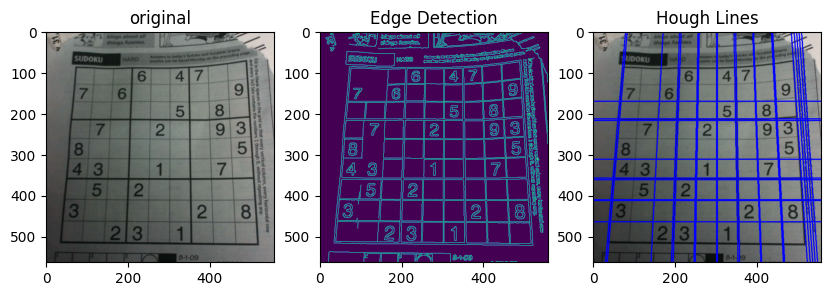

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('images/sudoku.png', cv.IMREAD_COLOR)

if im is None:
    print('image could not be read.')
    assert False

gray = cv.cvtColor(im, cv.COLOR_BGR2BGRA)
# edge detection
edges = cv.Canny(gray, 50, 150, apertureSize = 3)
lines = cv.HoughLines(edges, 1, np.pi/180, 200)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho

    x1 = int(x0 + 1000*(-b))

    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv.line(im, (x1,y1), (x2,y2), (0,0,255), 2)


fig, ax= plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(gray)
ax[0].set_title("original")
ax[2].imshow(im)
ax[2].set_title("Hough Lines")
ax[1].imshow(edges)
ax[1].set_title("Edge Detection")
plt.show()

Question 5

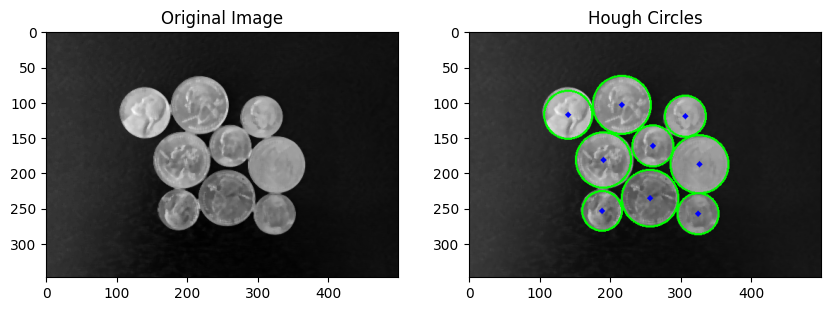

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


img = cv.imread('images/coins.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=180,param2=50,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # drawing outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # drawing center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)


fig, ax = plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(cimg)
ax[1].set_title("Hough Circles")
plt.show()


Question 6

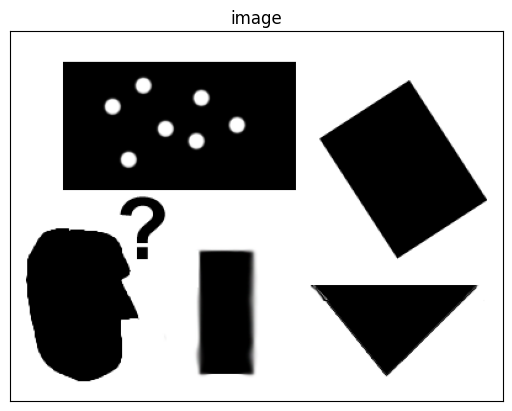

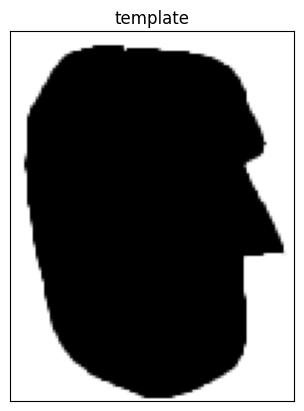

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('images/pic1.png')
template = cv.imread('images/templ.png')

def hough_match(template, image):
    # Convert the template and image to grayscale
    template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Apply Canny edge detection to the template and image
    template_edges = cv.Canny(template_gray, 50, 200)
    image_edges = cv.Canny(image_gray, 50, 200)

    # Apply the Hough Transform to the template and image edges
    template_lines = cv.HoughLinesP(template_edges, 1, np.pi/180, threshold=100, minLineLength=template.shape[0]//2, maxLineGap=10)
    image_lines = cv.HoughLinesP(image_edges, 1, np.pi/180, threshold=100, minLineLength=template.shape[0]//2, maxLineGap=10)

    # Extract the endpoints of the template lines
    template_points = []
    for line in template_lines:
        x1, y1, x2, y2 = line[0]
        template_points.append([(x1, y1), (x2, y2)])

    # Match the template lines with the image lines
    matches = []
    for template_line in template_points:
        for image_line in image_lines:
            if is_match(template_line, image_line):
                matches.append(image_line)

    return matches

def is_match(template_line, image_line, tolerance=10):
    # Calculate the length and angle of the template and image lines
    template_length, template_angle = line_info(template_line)
    image_length, image_angle = line_info(image_line)

    # Check if the length and angle of the image line are within the tolerance of the template line
    if abs(template_length - image_length) < tolerance and abs(template_angle - image_angle) < tolerance:
        return True
    else:
        return False

def line_info(line):
    # Calculate the length and angle of the line
    x1, y1, x2, y2 = line[0]
    length = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    angle = np.arctan2(y2-y1, x2-x1) * 180 / np.pi
    return length, angle


plt.imshow(image)
plt.title('image')
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(template)
plt.title('template')
plt.xticks([]), plt.yticks([])
plt.show()
